# Agent Positions

In [111]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [59]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from arcgis.gis import GIS
from getpass import getpass
gis = GIS("https://demoportal11.esri.de/portal", client_id=getpass("Enter App-ID:  "), client_secret=getpass("Enter App-Secret:  "))

Enter App-ID:  ········
Enter App-Secret:  ········
Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://demoportal11.esri.de/portal/sharing/rest/oauth2/authorize?response_type=code&client_id=kjoDK8QXEa66qX17&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=nmKDmoxE8rK958BY8iaQof7x6K5fFx&allow_verification=false
Enter code obtained on signing in using SAML: ········


In [92]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from arcgis.gis import GIS
from getpass import getpass
gis = GIS("https://demoportal11.esri.de/portal", client_id=getpass("Enter App-ID:  "))

Enter App-ID:  ········
Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://demoportal11.esri.de/portal/sharing/rest/oauth2/authorize?response_type=code&client_id=kjoDK8QXEa66qX17&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=fxSVkw3ZPDCqXiYAzONaCSMCLkYnNn&allow_verification=false
Enter code obtained on signing in using SAML: ········


In [16]:
df = pd.read_csv(r"C:\Users\thkn\OneDrive - Esri Deutschland + Esri Schweiz\Documents\data\midnight_weekday_agents.csv")
df2 = pd.read_csv(r"C:\Users\thkn\OneDrive - Esri Deutschland + Esri Schweiz\Documents\data\early_weekday_agents.csv")

In [43]:
# geometry = gpd.points_from_xy(7.1156570, 50.7201054, crs="EPSG:4326")
# p = Point(7.1156570, 50.7201054)

data = [("Esri Niederlassung Bonn", 50.7201054, 7.1156570)]
places = pd.DataFrame(data, columns=["name", "latitude", "longitude"])
places["geometry"] = places.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
del(places["latitude"], places["longitude"])

places = gpd.GeoDataFrame(places, geometry="geometry")
places.crs = {"init": "epsg:4326"}

# places = places.buffer(0.02)

places = places.to_crs(25832) #Pick another
places['geometry'] = places['geometry'].buffer(100)
places = places.to_crs(4326) #Back to 4326

# places.plot()
# plt.show()

C:\Users\thkn\AppData\Local\miniconda3\envs\carbon\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ProjError: x, y, z, and time must be same size

In [38]:
df_midnight_weekday = df
df_midnight_weekday["geometry"] = df_midnight_weekday.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)

del(df_midnight_weekday["latitude"], df_midnight_weekday["longitude"])

df_midnight_weekday = gpd.GeoDataFrame(df_midnight_weekday, geometry="geometry")


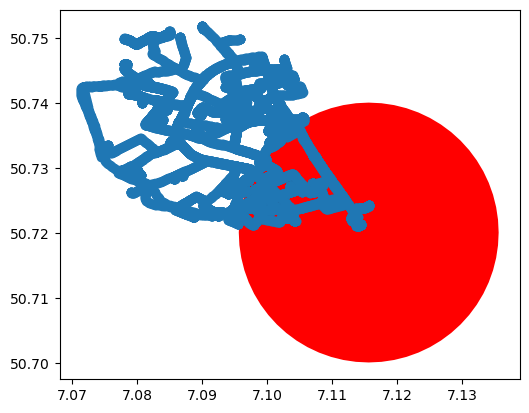

In [39]:
fig, ax = plt.subplots()

places.plot(ax=ax, color="red")
df_midnight_weekday.plot(ax=ax)

plt.show()

#### Anzahl der verschiedenen Personen

In [3]:
df["person"].nunique()

43

#### Anzahl der Personen, die an der Esri Niederlassung vorbeigelaufen sind

In [95]:
from arcgis.geometry import Point
from arcgis.features.analysis import create_buffers
from arcgis.features import FeatureSet, FeatureCollection

pt = Point({"x" : 7.1156570, "y" : 50.7201054, "spatialReference" : {"wkid" : 4326}})

feature = {
    "geometry": pt,
    "attributes": {}
}
feature_set = FeatureSet(features=[feature])
feature_set.display_field_name = "EsriBonn"
feature_collection = FeatureCollection.from_featureset(feature_set)
feature_collection

feature_collection_result = create_buffers(input_layer=feature_collection, distances = [50], units = "Meters") 
                                           #output_name="EsriBonn", future = True)
type(feature_collection_result)

feature_collection

<FeatureCollection>

In [96]:
print(feature_collection_result.properties)

{
  "featureSet": {
    "features": [
      {
        "attributes": {
          "OBJECTID": 1,
          "BUFF_DIST": 50,
          "ORIG_FID": 1,
          "AnalysisArea": 0.007836271868139242
        },
        "geometry": {
          "rings": [
            [
              [
                7.115657000170472,
                50.720554866414034
              ],
              [
                7.115739197306141,
                50.72055182760482
              ],
              [
                7.115820282879781,
                50.72054275164675
              ],
              [
                7.115899160617801,
                50.72052776084752
              ],
              [
                7.115974763024951,
                50.7205070575547
              ],
              [
                7.1160460684713485,
                50.72048092325605
              ],
              [
                7.116112111984421,
                50.72044971048581
              ],
              [
       

In [97]:
feature_set_buffer = feature_collection_result.query()
buffer_sdf = feature_set_buffer.sdf
buffer_sdf

,OBJECTID,BUFF_DIST,ORIG_FID,AnalysisArea,SHAPE
0,1,50.0,1,0.007836,"{""rings"": [[[7.115657000170472, 50.72055486641..."


In [28]:
gis = GIS()
# create an anonymous connection to ArcGIS Online and get a public item
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]

# Specify a SQL query and get a sub-set of the original data as a DataFrame
df = flayer.query(where="AGE_45_54 < 1500").sdf

# Visualize the top 5 records
df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.4,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{""x"": -12747828.64784961, ""y"": 5269214.8197742..."


In [56]:
myGIS = GIS()
myGIS.map()

m1 = GIS().map('Germany')
m1
# m1.zoom = 4
# m1.center = [39,-98]
# df.spatial.plot(map_widget= m1)

# m2= GIS().map('United States', zoomlevel=4)
# m2

MapView(layout=Layout(height='400px', width='100%'))

In [107]:
feature_collection_result.extent

AttributeError: 'FeatureCollection' object has no attribute 'extent'

In [102]:
buffer_map = GIS().map()

buffer_map.add_layer(feature_collection_result)
buffer_sdf.spatial.plot(map_widget = buffer_map)
# # type(dtbMap)

buffer_map.zoom_to_layer(feature_collection_result)
# buffer_map.legend = True

# for lyr in buffer_map.layers:
#     print(lyr.properties.name)
    
buffer_map

AttributeError: 'PropertyMap' instance has no attribute 'extent'

In [35]:
buffer_map = GIS().map()
buffer_sdf.spatial.plot(buffer_map)
# type(dtbMap)

buffer_map

MapView(layout=Layout(height='400px', width='100%'))

#### authenticate / Anzeige der Karte

In [5]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from arcgis.gis import GIS
from getpass import getpass

Authentifizierung mit dem Demoportal, um auf die Ressourcen zugreifen zu können.

In [78]:
gis = GIS("https://esridech.maps.arcgis.com/", client_id=getpass("Enter App-ID:  "))
# print("Successfully logged in as: " + gis.properties.user.username)

Enter App-ID:  ········
Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://esridech.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=58QRtW537gEecTuf&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=1y7XGfo7VG5ubYnbTT60HvQOmKRNh0&allow_verification=false
Enter code obtained on signing in using SAML: ········


#### Hinzufügen des Pfades vom Ordner des spatialcarbon.experiment Module
Erforderlich, da eigenes Modul im Ordner "src" liegt und das Notebook im Homefolder "green-spatial-engineering" gestartet wird

In [7]:
import sys
sys.path.append("../src")
sys.path

['C:\\src\\green-spatial-engineering\\notebooks',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\python39.zip',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\DLLs',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\lib',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon',
 '',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\lib\\site-packages',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\lib\\site-packages\\pytz-2022.6-py3.9.egg',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\lib\\site-packages\\pywin32security',
 'C:\\Users\\thkn\\AppData\\Local\\miniconda3\\envs\\carbon\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\thkn\\.ipython',
 '../src']

In [8]:
from arcgis.features import FeatureLayer
from codecarbon import EmissionsTracker
from glob import glob
import logging
import os
from spatialcarbon.experiment import Experiment

In [17]:
experiment = Experiment("DTB", "cnt P Midnight FS")
tracker_name = experiment.create_tracker_name()

# Creates a new tracker object    
tracker = EmissionsTracker(project_name=tracker_name, output_dir="../log")

[codecarbon INFO @ 12:37:49] [setup] RAM Tracking...
[codecarbon INFO @ 12:37:49] [setup] GPU Tracking...
[codecarbon INFO @ 12:37:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 12:37:49] [setup] CPU Tracking...
[codecarbon WARNING @ 12:37:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 12:37:51] We saw that you have a Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:37:51] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
[codecarbon INFO @ 12:37:51] >>> Tracker's metadata:
[codecarbon INFO @ 12:37:51]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 12:37:51]   Python version: 3.9.11
[codecarbon INFO @ 12:37:51]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 12:37:51]   Available RAM : 31.807 GB
[codecarbon INFO @ 12:37:51]   CPU count: 8
[codecarbon INFO @ 12:37:51]   CPU model: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
[codecarbon IN

In [18]:
tracker.start()

In [19]:
traffic_layer_midnight = FeatureLayer("https://services3.arcgis.com/JhD3NyxTJcNiae8J/arcgis/rest/services/Agent_Positions/FeatureServer/0")
traffic_count_midnight = traffic_layer_midnight.query(return_count_only = True)

In [20]:
tracker.stop()

[codecarbon INFO @ 12:37:55] Energy consumed for RAM : 0.000004 kWh. RAM Power : 11.92749309539795 W
[codecarbon INFO @ 12:37:55] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 12:37:55] Energy consumed for all CPUs : 0.000014 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:37:55] 0.000018 kWh of electricity used since the beginning.


6.2916325482913285e-06

In [21]:
experiment = Experiment("DTB", "cnt P early Day FS")
tracker_name = experiment.create_tracker_name()

# Creates a new tracker object    
tracker = EmissionsTracker(project_name=tracker_name, output_dir="../log")

[codecarbon INFO @ 12:37:59] [setup] RAM Tracking...
[codecarbon INFO @ 12:37:59] [setup] GPU Tracking...
[codecarbon INFO @ 12:37:59] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 12:37:59] [setup] CPU Tracking...
[codecarbon WARNING @ 12:37:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 12:38:01] We saw that you have a Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:38:01] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
[codecarbon INFO @ 12:38:01] >>> Tracker's metadata:
[codecarbon INFO @ 12:38:01]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 12:38:01]   Python version: 3.9.11
[codecarbon INFO @ 12:38:01]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 12:38:01]   Available RAM : 31.807 GB
[codecarbon INFO @ 12:38:01]   CPU count: 8
[codecarbon INFO @ 12:38:01]   CPU model: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
[codecarbon IN

In [22]:
tracker.start()

In [23]:
traffic_layer_early = FeatureLayer("https://services3.arcgis.com/JhD3NyxTJcNiae8J/arcgis/rest/services/Agent_Positions_early_weekday/FeatureServer/0")
traffic_count_early = traffic_layer_early.query(return_count_only = True)

In [24]:
tracker.stop()

[codecarbon INFO @ 12:38:05] Energy consumed for RAM : 0.000004 kWh. RAM Power : 11.92749309539795 W
[codecarbon INFO @ 12:38:05] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 12:38:05] Energy consumed for all CPUs : 0.000013 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:38:05] 0.000016 kWh of electricity used since the beginning.


5.794561187699564e-06

In [ ]:
traffic_count_earlyday = traffic_layer_early.query(return_count_only = True)

In [ ]:
traffic_fset2

In [ ]:
traffic_sdf = traffic_fset.sdf
traffic_sdf

In [ ]:
traffic_sdf2 = traffic_fset2.sdf
traffic_sdf2